In [1]:
import cPickle as pkl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
#descriptor = '_constant_tRNAs'
descriptor = '_varying_tRNAs'

In [4]:
dft = pkl.load(open('../../results/dft' + descriptor + '.p', 'r'))

In [5]:
dft.head(n=10)

,ribosomes,transcripts,index,geneID,init_rate,length,tic_toc
0,1000,28808,0,YBR177C,0.000002,1356,NaN
1,1000,28808,1,YBR177C,0.000002,1356,NaN
2,1000,28808,2,YBR177C,0.000002,1356,71.75
3,1000,28808,3,YBR177C,0.000002,1356,NaN
4,1000,28808,4,YIL140W,0.000002,2472,124.90
5,1000,28808,5,YIL140W,0.000002,2472,120.45
6,1000,28808,6,YLR268W,0.000002,645,42.10
7,1000,28808,7,YLR268W,0.000002,645,NaN
8,1000,28808,8,YLR268W,0.000002,645,NaN
9,1000,28808,9,YLR268W,0.000002,645,NaN


In [6]:
dftnotnan = dft[dft.tic_toc.notnull()]
del dftnotnan['index']

In [7]:
dftnotnan.head(n=10)

,ribosomes,transcripts,geneID,init_rate,length,tic_toc
2,1000,28808,YBR177C,1.644214e-06,1356,71.750
4,1000,28808,YIL140W,1.649229e-06,2472,124.900
5,1000,28808,YIL140W,1.649229e-06,2472,120.450
6,1000,28808,YLR268W,1.844285e-06,645,42.100
14,1000,28808,YPL043W,2.096261e-06,2058,93.275
16,1000,28808,YPL043W,2.096261e-06,2058,86.300
17,1000,28808,YJL155C,1.490352e-06,1359,74.650
21,1000,28808,YHR067W,6.017500e-07,843,44.900
24,1000,28808,YNR028W,1.223340e-06,927,58.050
31,1000,28808,YNL007C,3.786621e-06,1059,53.750


Calculate mean tic_tocs:

In [8]:
dft_grouped = dftnotnan.groupby(['geneID', 'init_rate', 'length', 'ribosomes', 'transcripts'], as_index=False).mean()

Calculate ribosome speeds:

In [9]:
dft_grouped['ribosome_speed'] = dft_grouped.length / dft_grouped.tic_toc / 3.

In [10]:
dft_grouped.head(n=20)

,geneID,init_rate,length,ribosomes,transcripts,tic_toc,ribosome_speed
0,YAL001C,7.602266e-07,3483,2000,28808,190.300000,6.100893
1,YAL001C,7.602266e-07,3483,5000,28808,182.550000,6.359901
2,YAL001C,7.602266e-07,3483,5000,57558,190.166667,6.105171
3,YAL001C,7.602266e-07,3483,10000,28808,189.954167,6.112001
4,YAL001C,7.602266e-07,3483,10000,57558,185.991667,6.242215
5,YAL001C,7.602266e-07,3483,20000,28808,184.891667,6.279353
6,YAL001C,7.602266e-07,3483,20000,57558,190.447917,6.096155
7,YAL001C,7.602266e-07,3483,50000,28808,183.583333,6.324103
8,YAL001C,7.602266e-07,3483,50000,57558,181.908333,6.382335
9,YAL001C,7.602266e-07,3483,100000,28808,161.495000,7.189077


Next step: produce series by number of ribosomes.

We want to only include genes for which we have all 9 ribosome counts in the table.

In [11]:
gene_count_28808 = pd.DataFrame(dft_grouped[dft_grouped.transcripts==28808]['geneID'].value_counts())
gene_count_28808 = gene_count_28808[gene_count_28808['geneID']==9]
gene_count_28808.columns =  ['data_count']
len(gene_count_28808)

1976

In [12]:
gene_count_57558 = pd.DataFrame(dft_grouped[dft_grouped.transcripts==57558]['geneID'].value_counts())
gene_count_57558 = gene_count_57558[gene_count_57558['geneID']==9]
gene_count_57558.columns =  ['data_count']
len(gene_count_57558)

2315

In [13]:
dft_selected_28808 = pd.merge(gene_count_28808, dft_grouped[dft_grouped.transcripts==28808], left_index = True, right_on='geneID')
dft_selected_57558 = pd.merge(gene_count_57558, dft_grouped[dft_grouped.transcripts==57558], left_index = True, right_on='geneID')

In [14]:
dft_selected_28808.head(n=19)

,data_count,geneID,init_rate,length,ribosomes,transcripts,tic_toc,ribosome_speed
4433,9,YBR177C,0.000002,1356,1000,28808,71.750000,6.299652
4435,9,YBR177C,0.000002,1356,2000,28808,69.412500,6.511795
4437,9,YBR177C,0.000002,1356,5000,28808,69.316667,6.520798
4439,9,YBR177C,0.000002,1356,10000,28808,66.989375,6.747339
4441,9,YBR177C,0.000002,1356,20000,28808,64.725000,6.983391
4443,9,YBR177C,0.000002,1356,50000,28808,61.320038,7.371163
4445,9,YBR177C,0.000002,1356,100000,28808,57.199687,7.902141
4447,9,YBR177C,0.000002,1356,200000,28808,51.000721,8.862620
4449,9,YBR177C,0.000002,1356,500000,28808,48.347713,9.348943
43243,9,YLL023C,0.000002,840,1000,28808,43.950000,6.370876


In [15]:
ribosomes = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000]

https://stackoverflow.com/questions/37967786/axes-from-plt-subplots-is-a-numpy-ndarray-object-and-has-no-attribute-plot

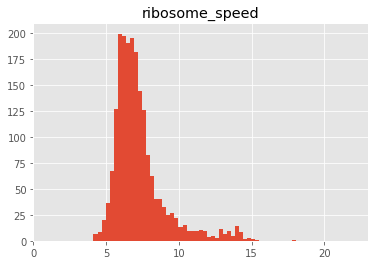

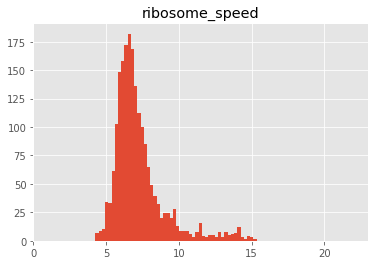

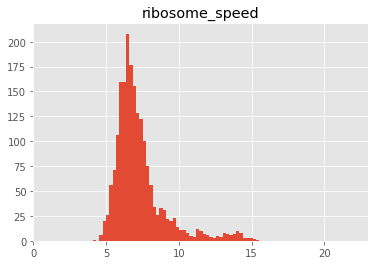

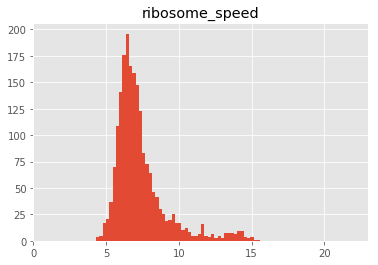

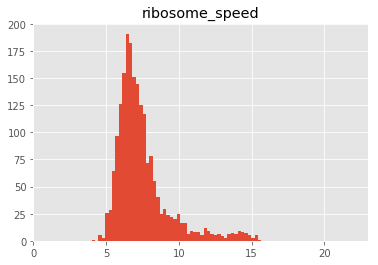

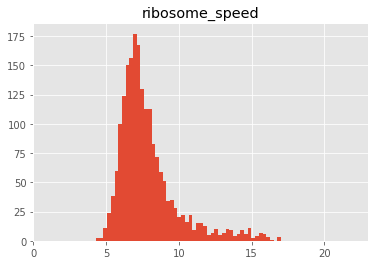

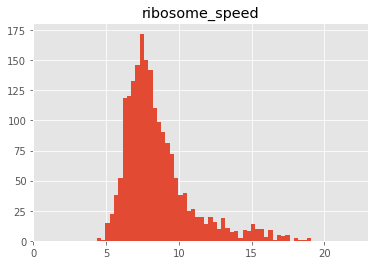

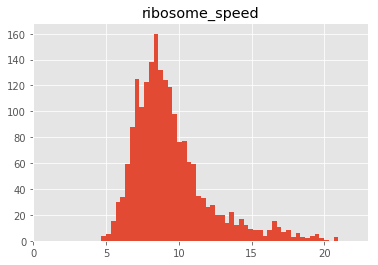

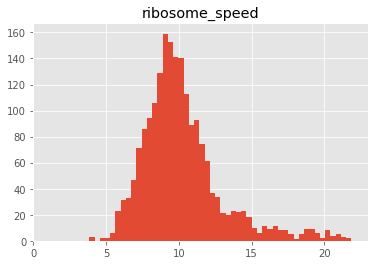

In [16]:
for ribos in ribosomes:
    ax = dft_selected_28808[dft_selected_28808.ribosomes==ribos].hist(column='ribosome_speed', bins=50)
    ax[0, 0].set_xlim([0, 23]) 

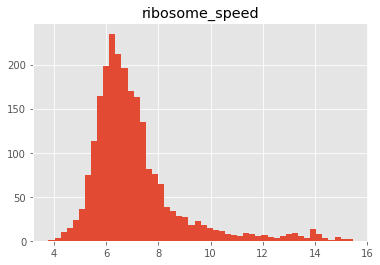

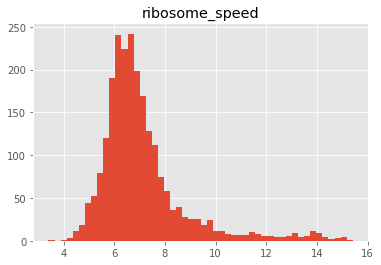

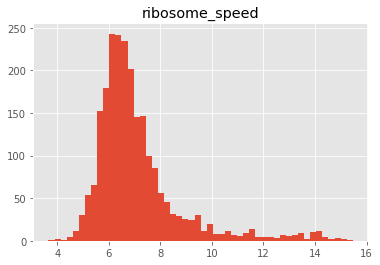

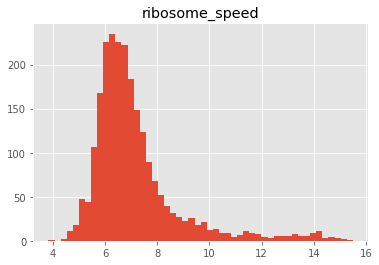

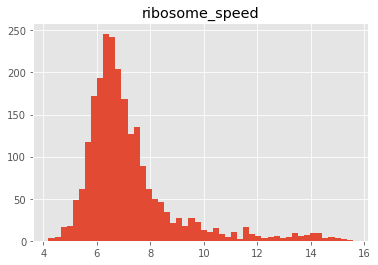

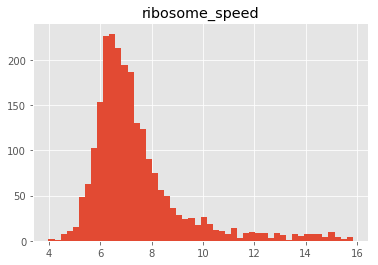

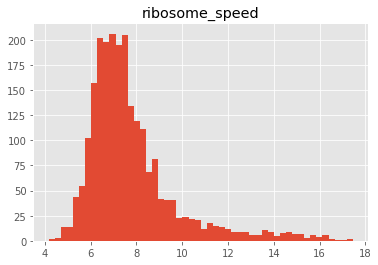

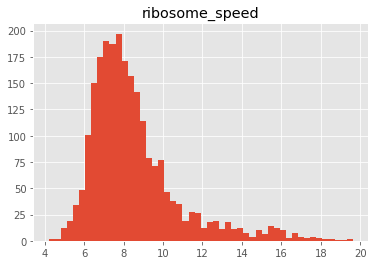

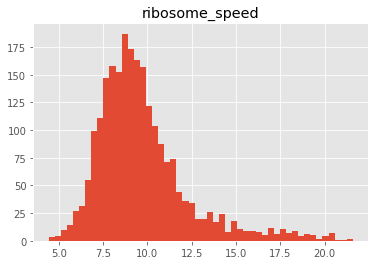

In [17]:
for ribos in ribosomes:
    dft_selected_57558[dft_selected_57558.ribosomes==ribos].hist(column='ribosome_speed', bins=50)

Looks interesting. Check the statistics:

In [18]:
for ribos in ribosomes:
    print
    print ribos
    print dft_selected_28808[dft_selected_28808.ribosomes==ribos][['tic_toc', 'ribosome_speed']].describe()


1000
           tic_toc  ribosome_speed
count  1976.000000     1976.000000
mean     61.687939        7.254443
std      47.741929        1.810557
min       3.114323        4.132420
25%      31.052630        6.116608
50%      50.068750        6.834433
75%      75.906250        7.709975
max     776.150000       18.032787

2000
           tic_toc  ribosome_speed
count  1976.000000     1976.000000
mean     61.557926        7.253806
std      47.344320        1.797163
min       3.216689        4.264264
25%      31.070833        6.159884
50%      50.238750        6.784222
75%      76.031250        7.675918
max     766.412500       15.343067

5000
           tic_toc  ribosome_speed
count  1976.000000     1976.000000
mean     61.150356        7.281609
std      46.614493        1.799864
min       3.293473        4.066768
25%      31.084670        6.193264
50%      50.185898        6.814141
75%      75.400893        7.708333
max     717.850000       15.515928

10000
           tic_toc  ribosome_s

In [19]:
for ribos in ribosomes:
    print
    print ribos
    print dft_selected_57558[dft_selected_57558.ribosomes==ribos][['tic_toc', 'ribosome_speed']].describe()


1000
           tic_toc  ribosome_speed
count  2315.000000     2315.000000
mean     64.324402        7.088574
std      46.976187        1.730538
min       3.281771        3.790665
25%      32.837500        6.050839
50%      52.083333        6.686717
75%      81.811667        7.504675
max     479.275000       15.450120

2000
           tic_toc  ribosome_speed
count  2315.000000     2315.000000
mean     64.195428        7.099089
std      47.094722        1.719191
min       3.303402        3.400000
25%      32.687054        6.104017
50%      52.483333        6.707489
75%      80.199387        7.505683
max     493.250000       15.414791

5000
           tic_toc  ribosome_speed
count  2315.000000     2315.000000
mean     64.027575        7.104687
std      46.784924        1.715801
min       2.350000        3.658373
25%      32.743646        6.106513
50%      51.950000        6.654430
75%      80.561667        7.493371
max     490.825000       15.465329

10000
           tic_toc  ribosome_s

Un-melt data to access ribosomes (https://stackoverflow.com/questions/22127569/opposite-of-melt-in-python-pandas):

In [20]:
dft_times = dft_selected_28808.pivot(index='geneID', columns='ribosomes')['tic_toc']
dft_times.head(n=10)

ribosomes,1000,2000,5000,10000,20000,50000,100000,200000,500000
geneID,,,,,,,,,
YAL003W,14.609024,14.639597,14.567964,14.424651,14.181275,13.411301,12.293234,11.058556,10.118891
YAL007C,28.016667,28.595000,25.737333,26.888000,27.195503,26.430987,25.237569,22.713066,20.450476
YAL012W,45.836343,45.228200,44.896690,44.437775,42.786804,38.818201,34.434225,31.433884,38.237864
YAL016W,103.225000,95.425000,96.675000,93.889583,85.782143,85.622222,74.055929,65.191820,61.069956
YAL021C,145.950000,150.900000,130.600000,142.875000,134.500000,127.771429,116.950000,104.345000,91.691667
YAL023C,111.300000,106.910000,104.547619,100.860952,99.497347,93.430145,83.530671,74.321913,65.845562
YAL025C,41.350000,43.387500,40.456250,42.943403,39.280220,36.201708,33.081563,29.731950,32.068571
YAL026C,191.450000,177.150000,190.083333,183.841667,188.972222,175.495833,158.153333,138.665278,120.768519
YAL030W,19.700000,22.225000,19.284444,19.114286,20.075370,20.010151,19.482015,18.190888,17.001590


Time for many ribosomes as percent of time for few ribosomes:

In [21]:
gene_count_28808['tic_toc_acceleration_percent'] = dft_times[500000] / dft_times[1000]
gene_count_28808['tic_toc_acceleration_absolute'] = dft_times[500000] - dft_times[1000]

In [22]:
combined = pd.merge(dft_selected_28808, gene_count_28808, left_on='geneID', 
         right_index=True).groupby(['geneID', 'init_rate', 'length', 'transcripts'], as_index=False).mean()
combined.head(n=10)

,geneID,init_rate,length,transcripts,data_count_x,ribosomes,tic_toc,ribosome_speed,data_count_y,tic_toc_acceleration_percent,tic_toc_acceleration_absolute
0,YAL003W,5.982788e-06,621,28808,9,98666,13.256055,15.879341,9,0.692647,-4.490133
1,YAL007C,2.023321e-06,648,28808,9,98666,25.696067,8.492744,9,0.729940,-7.566191
2,YAL012W,4.492416e-06,1185,28808,9,98666,40.678887,9.868072,9,0.834226,-7.598478
3,YAL016W,1.918107e-06,1908,28808,9,98666,84.548517,7.753244,9,0.591620,-42.155044
4,YAL021C,1.016482e-06,2514,28808,9,98666,127.287011,6.744639,9,0.628240,-54.258333
5,YAL023C,1.318002e-06,2280,28808,9,98666,93.360468,8.375659,9,0.591604,-45.454438
6,YAL025C,4.348961e-06,921,28808,9,98666,37.611241,8.301379,9,0.775540,-9.281429
7,YAL026C,6.467539e-07,4068,28808,9,98666,169.397798,8.192253,9,0.630810,-70.681481
8,YAL030W,1.672338e-06,354,28808,9,98666,19.453749,6.094502,9,0.863025,-2.698410
9,YAL033W,1.205500e-06,522,28808,9,98666,33.778473,5.188765,9,0.730164,-10.698988


In [23]:
def scatter_dicts(dict1, dict2, xaxislabel=None, yaxislabel=None, fontsize=None, markersize=20,
                  alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=True, ylog=True):
    plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
    print len(plotkeys)
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    fig =  plt.figure(figsize=figsize)                

    ax = fig.add_subplot(111)
    #ax.set_rasterization_zorder(1)
    
    ax.grid(True, linestyle = '-', color = '0.75')
    if xlog:
        ax.set_xscale('log')
    else:
        ax.set_xscale('linear')
    if ylog:
        ax.set_yscale('log')
    else:
        ax.set_yscale('linear')
    if xaxislabel:
        ax.set_xlabel(xaxislabel)
        if fontsize:
            ax.set_xlabel(xaxislabel, fontsize=fontsize)
            plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    if yaxislabel:
        ax.set_ylabel(yaxislabel)
        if fontsize:
            ax.set_ylabel(yaxislabel, fontsize=fontsize)
            plt.setp(ax.get_yticklabels(), fontsize=fontsize)

    scat = plt.scatter(xs, ys,
                       #c=plt.rcParams['axes.color_cycle'][0], 
                       #c=myfacecolor, 
                       #edgecolor=plt.rcParams['patch.edgecolor'],
                       #edgecolor=myedgecolor,
                       s=markersize, zorder=0)
    scat.set_alpha(alpha)
    #scat.set_color()
    #scat.set_edgecolors(plt.rcParams['patch.edgecolor'])
    # , color=, edgecolor=

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points][:-2]  # modify to remove outliers 
    new_ys = [point[1] for point in sorted_points][:-2]  # modify to remove outliers
    ylowess = lowess(new_ys, new_xs)[:,1]
    plt.plot(new_xs, ylowess, plt.rcParams['axes.color_cycle'][1], linewidth=4)

    ax.set_rasterization_zorder(1)

    plt.savefig(filename, bbox_inches='tight', dpi=200)

In [24]:
dict_length = dict(zip(combined.geneID, combined.length))
dict_tic_toc_acceleration_percent = dict(zip(combined.geneID, combined.tic_toc_acceleration_percent))

1976


/home/martin/.local/lib/python2.7/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


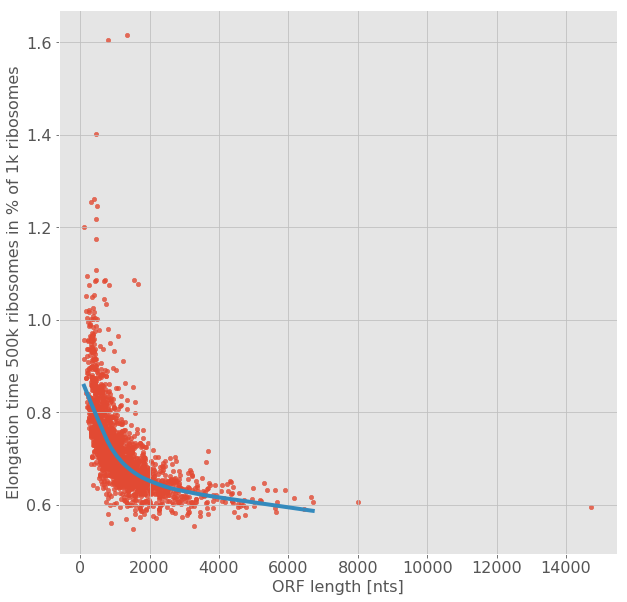

In [25]:
scatter_dicts(dict_length, dict_tic_toc_acceleration_percent, xaxislabel='ORF length [nts]', 
              yaxislabel='Elongation time 500k ribosomes in % of 1k ribosomes', fontsize=16, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=False,
             ylog=False)

Values below 1 mean that with many ribosomes elongation is faster than with fewer ribosomes.

In [26]:
dict_tic_toc_acceleration_absolute = dict(zip(combined.geneID, combined.tic_toc_acceleration_absolute))

1976


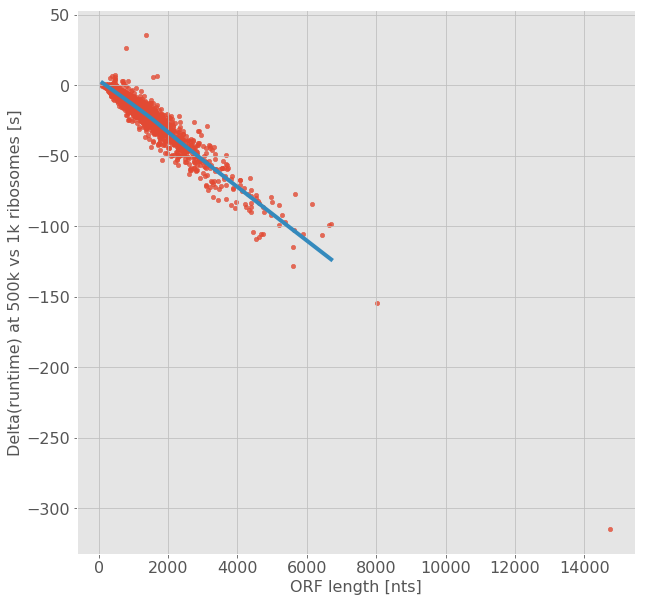

In [27]:
scatter_dicts(dict_length, dict_tic_toc_acceleration_absolute, xaxislabel="ORF length [nts]", 
              yaxislabel="Delta(runtime) at 500k vs 1k ribosomes [s]", fontsize=16, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=False,
             ylog=False)

This is as expected, with the absolute time saving roughly proportional to ORF length.

Just a check ('cigar graph'):

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


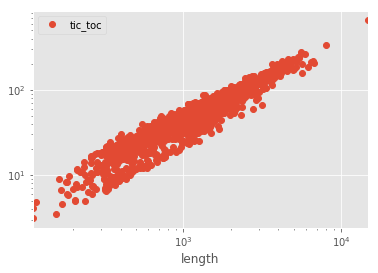

In [28]:
ax = combined.sort('length').plot(x='length', y='tic_toc', style='o')
ax.set_yscale('log')
ax.set_xscale('log')

In [29]:
dict_init_rate = dict(zip(combined.geneID, combined.init_rate))
dict_tic_toc_acceleration_percent = dict(zip(combined.geneID, combined.tic_toc_acceleration_percent))

1976


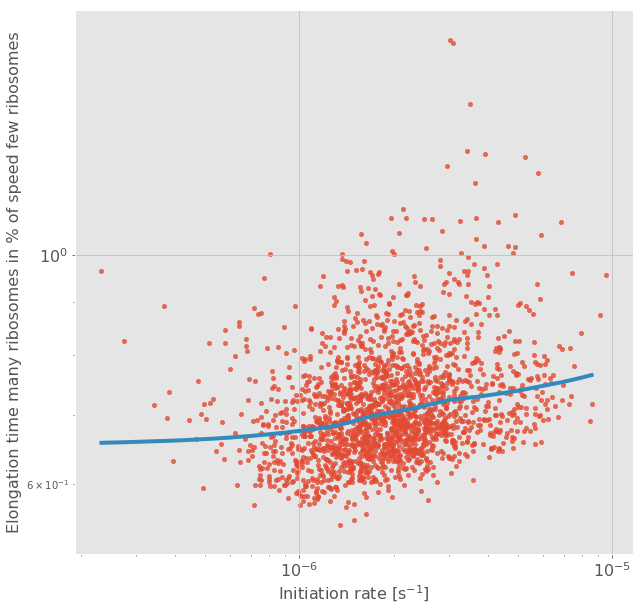

In [30]:
scatter_dicts(dict_init_rate, dict_tic_toc_acceleration_percent, xaxislabel='Initiation rate [s$^ {-1}$]', 
              yaxislabel='Elongation time many ribosomes in % of speed few ribosomes', fontsize=16, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=True, 
              ylog=True)

Interesting. There is an increase of `tic_toc_acceleration_percent` with initiation rate.

1976


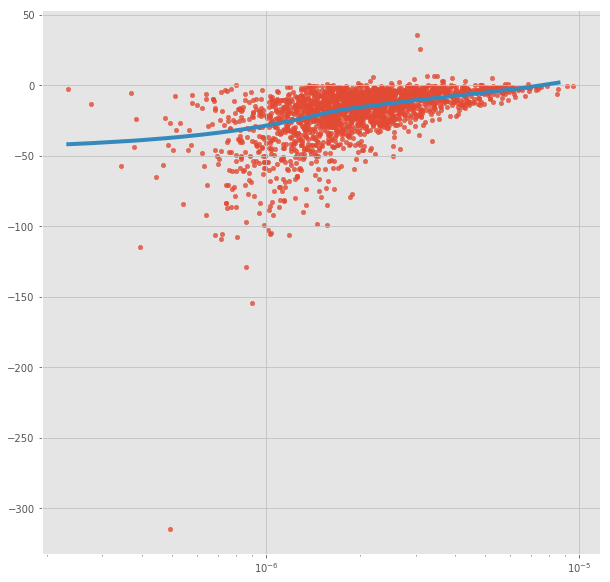

In [31]:
scatter_dicts(dict_init_rate, dict_tic_toc_acceleration_absolute, xaxislabel=None, yaxislabel=None, fontsize=None, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=True,
             ylog=False)

There is also an increase of `tic_toc_acceleration_absolute` with initiation rate.

This is not an effect of the connection between length and initiation rate, shown in the following chart.

Increasing initiation rate $\Longrightarrow$ decreasing ORF length $\Longrightarrow$ _decreasing acceleration_


So the length effect even overcompensates this effect!?

Let's try to explain it as follows:

Few ribosomes (slow elongation time) --- many ribosomes (fast elongation time)

DIRECT or INDIRECT?

1976


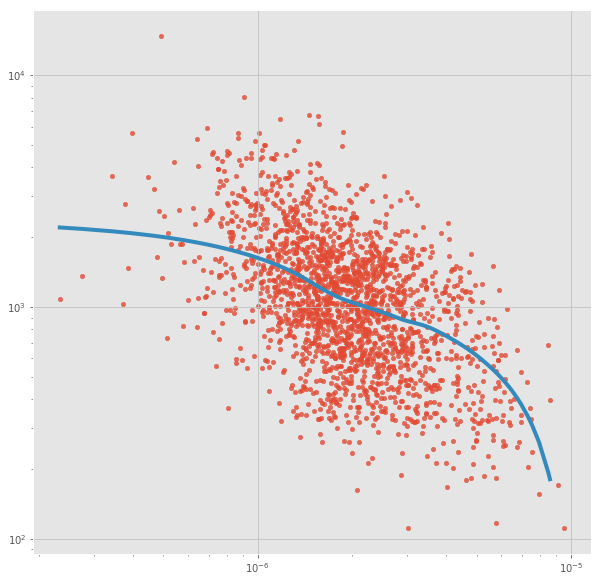

In [32]:
scatter_dicts(dict_init_rate, dict_length, xaxislabel=None, yaxislabel=None, fontsize=None, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=True,
             ylog=True)

It is elongation, so let us check the tAI!

In [33]:
tAI = pkl.load(open("../../parameters/tAI_python_chu.p", "rb"))

In [34]:
pd.DataFrame.from_dict(tAI.items()).head(n=10)

,0,1
0,YAL008W,0.386541
1,YBR255W,0.346265
2,YGR164W,0.279946
3,YGR131W,0.322574
4,YNL003C,0.334264
5,YBR135W,0.383288
6,YBR160W,0.403351
7,YJL082W,0.392114
8,YJL142C,0.263471
9,YPL191C,0.342415


In [35]:
combined = pd.merge(combined, pd.DataFrame.from_dict(tAI.items()), how='inner', left_on=['geneID'], right_on=[0])

In [36]:
combined = combined.drop(0, 1)

In [37]:
combined.rename(columns = {1: 'tAI'}, inplace=True)

In [38]:
combined.head(n=5)

,geneID,init_rate,length,transcripts,data_count_x,ribosomes,tic_toc,ribosome_speed,data_count_y,tic_toc_acceleration_percent,tic_toc_acceleration_absolute,tAI
0,YAL003W,0.000006,621,28808,9,98666,13.256055,15.879341,9,0.692647,-4.490133,0.642515
1,YAL007C,0.000002,648,28808,9,98666,25.696067,8.492744,9,0.729940,-7.566191,0.443200
2,YAL012W,0.000004,1185,28808,9,98666,40.678887,9.868072,9,0.834226,-7.598478,0.498714
3,YAL016W,0.000002,1908,28808,9,98666,84.548517,7.753244,9,0.591620,-42.155044,0.407121
4,YAL021C,0.000001,2514,28808,9,98666,127.287011,6.744639,9,0.628240,-54.258333,0.377059


1976


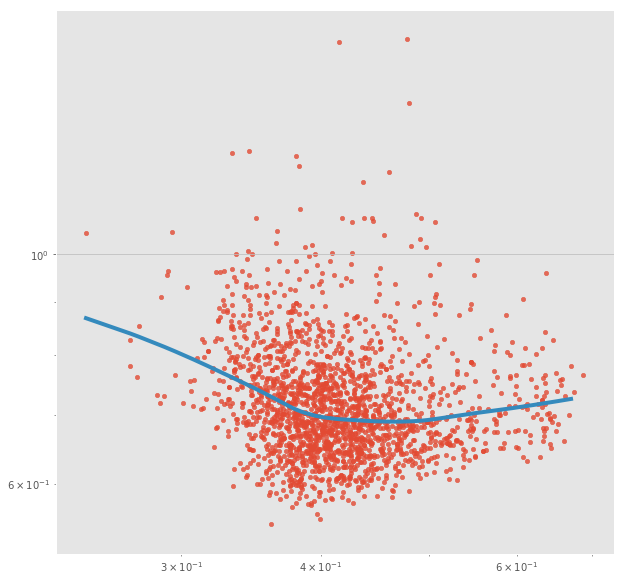

In [39]:
scatter_dicts(tAI, dict_tic_toc_acceleration_percent, xaxislabel=None, yaxislabel=None, fontsize=None, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png")

1976


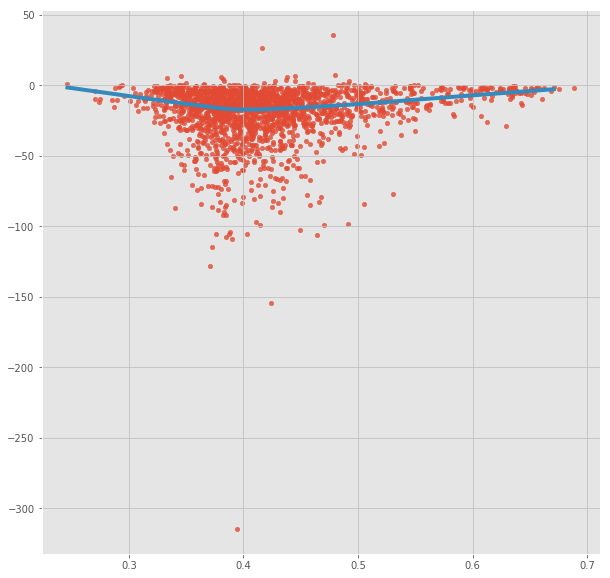

In [40]:
scatter_dicts(tAI, dict_tic_toc_acceleration_absolute, xaxislabel=None, yaxislabel=None, fontsize=None, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=False,
             ylog=False)

In [41]:
dict_tic_toc = dict(zip(combined.geneID, combined.tic_toc))

1976


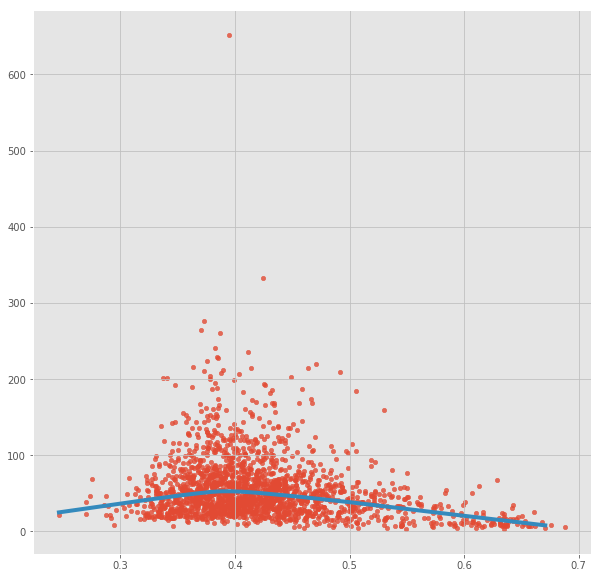

In [42]:
scatter_dicts(tAI, dict_tic_toc, xaxislabel=None, yaxislabel=None, fontsize=None, 
              markersize=20, alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png", xlog=False,
             ylog=False)

No obvious connection with tAI, so unlikely to be a tRNA effect.